In [25]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file  )
results = get_results_for_p(p,all_results)

with open("results_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
results_GE = get_results_for_p(p,all_results)

with open("model_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
model = get_results_for_p(p,all_results)

No results found for p = (3, 100, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 1.0, 1.0)
(3, 100, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 1.0, 1.0)
(3, 100, 6, 5, 6, 0.5, 0.5, 5.0, 0.85, 1.0, 1.0)


In [3]:
#Fixing the model with no hmq
with open("model_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
key = (3, 100, 6, 5, 1, 0.5, 1.0, 5.0, 0.85, 1.0, 1.0) #This is the key from the model of the same size, but no HMQ
# Check if the key exists in the saved results
if key in all_results:
        print(key)
model =    all_results[key]

(3, 100, 6, 5, 1, 0.5, 1.0, 5.0, 0.85, 1.0, 1.0)


In [4]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def get_avg_column(sim_df,name):
    employed = sim_df[sim_df['f'] > 0]
    # Average hiring is assumed to be in column 'n0'
    return employed.groupby('t')[name].mean()

def add_custom_legends(simulation_names, line_labels=['Wage', 'Hiring'], line_styles=None, lw=2, sim_loc='upper left', style_loc='upper right'):
    """
    Adds custom legends to the current plot.
    
    Parameters:
    - simulation_names: list of str, names of your simulation groups.
    - lw: float, line width for the legend handles.
    - sim_loc: str, location for the simulation group legend.
    - style_loc: str, location for the line style legend.
    """
    # Get the default color cycle from matplotlib
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    # Create legend handles for simulation groups (colors)
    sim_handles = [Line2D([0], [0], color=colors[i % len(colors)], lw=lw)
                   for i, name in enumerate(simulation_names)]
    legend1 = plt.legend(sim_handles, simulation_names, title="Firm Type", loc=sim_loc)
    
    # Use default line styles if none provided
    if line_styles is None:
        default_styles = ['-', ':', '--', '-.']
        line_styles = default_styles[:len(line_labels)]
    
    # Create legend handles for the line styles
    style_handles = [Line2D([0], [0], color='black', lw=lw, linestyle=ls) 
                     for ls in line_styles]
    legend2 = plt.legend(style_handles, line_labels, title="Line Style", loc=style_loc)
    
    # Ensure both legends appear on the plot
    plt.gca().add_artist(legend1)

In [5]:
#Simulation
from simulate import Simulator
sim = Simulator(model,p)
simulation = sim.simulate_val

Shock Path of the Firm

In [5]:
(pr,rho,q,nt,allow_hiring,allow_leave,update_z,z_dir,seed) = (p.z_0-1,30,p.q_0,100, True,True,True,None,True)

In [6]:
#Simulating a bunch of firms
irf_simul_young_small = sim.simulate_firm(pr,1,0,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_young_big =   sim.simulate_firm(pr,4,0,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_old_small =   sim.simulate_firm(pr,0,1,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_old_big =     sim.simulate_firm(pr,0,4,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
#irf_simul_all_small =   sim.simulate_firm(pr,1,1,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
#irf_simul_all_big =     sim.simulate_firm(pr,2,2,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)

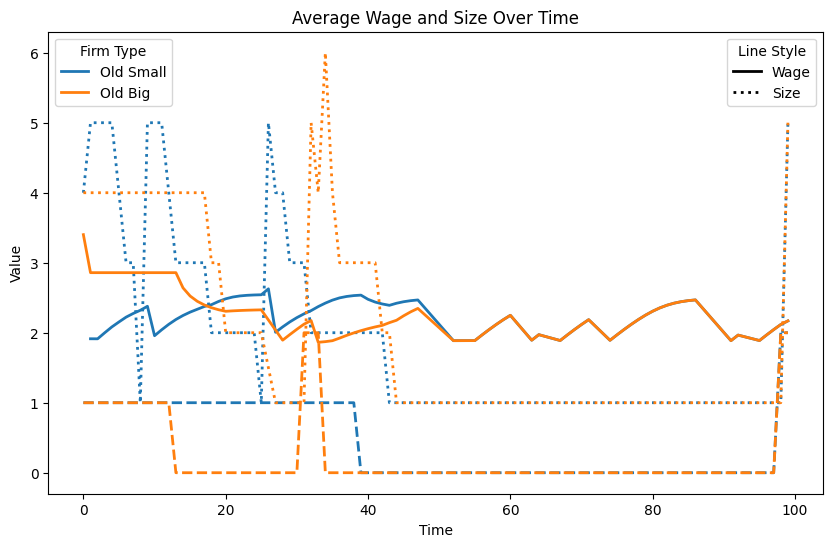

In [7]:
# Example usage:
# Suppose you already have your simulation dictionary defined as:
simulations = {
    #'Young Small': irf_simul_young_small,
    'Old Small': irf_simul_young_big,
    #'Young Big': irf_simul_old_small,
    'Old Big': irf_simul_old_big
}

# And you've computed average wages and hiring as before:
def get_avg_wage(sim_df):
    employed = sim_df[sim_df['f'] > 0]  # Employed workers only
    return employed.groupby('t')['w'].mean()
def get_avg_wage_sen(sim_df):
    employed = sim_df[(sim_df['f'] > 0) & (sim_df['S'] > 1)]  # Employed senior workers only
    return employed.groupby('t')['w'].mean()

def get_avg_hiring(sim_df):
    return sim_df.groupby('t')['n0'].mean()

avg_size = {name: get_avg_column(df,'n') for name, df in simulations.items()}
avg_wages = {name: get_avg_wage_sen(df) for name, df in simulations.items()}
avg_shock = {name: get_avg_column(df,'z') for name, df in simulations.items()}
#avg_hirings = {name: get_avg_hiring(df) for name, df in simulations.items()}

# Now create a plot using the same color for each simulation group
plt.figure(figsize=(10, 6))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, name in enumerate(simulations.keys()):
    color = colors[i % len(colors)]
    wage_series = avg_wages[name]
    #hiring_series = avg_hirings[name]
    size_series = avg_size[name]
    shock_series = avg_shock[name]        
    # Solid line for wage
    plt.plot(wage_series.index, wage_series, lw=2, color=color)
    # Dotted line for hiring
    #plt.plot(hiring_series.index, hiring_series, lw=2, color=color, linestyle=':')
    plt.plot(size_series.index, size_series, lw=2, color=color, linestyle=':')    
    plt.plot(shock_series.index, shock_series, lw=2, color=color, linestyle='--')    

# Set discrete x-ticks based on the time points

all_times = np.sort(np.unique(np.concatenate([wage.index for wage in avg_wages.values()])))
#plt.xticks(all_times, all_times)
plt.xticks()

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Average Wage and Size Over Time')

# Add the custom legends by calling the helper function
add_custom_legends(list(simulations.keys()),line_labels=['Wage','Size'])

plt.show()

Comparing firm with/without shock

In [6]:
(pr,rho,q,nt,allow_hiring,allow_leave,update_z,z_dir,seed) = (p.z_0-1,40,p.q_0,20, True,True,True,1,True)

In [37]:
#Simulating a bunch of firms
irf_simul_young_small_noshock =     sim.simulate_firm(pr,0,1,rho,q,nt, allow_hiring,allow_leave,True,0,seed)
irf_simul_young_small_posshock =    sim.simulate_firm(pr,0,1,rho,q,nt, allow_hiring,allow_leave,True,1,seed)
irf_simul_young_small_negshock =    sim.simulate_firm(pr,0,1,rho,q,nt, allow_hiring,allow_leave,True,-1,seed)
#Big firms
irf_simul_young_big_noshock =     sim.simulate_firm(pr,0,5,rho,q,nt, allow_hiring,allow_leave,True,0,seed)
irf_simul_young_big_posshock =    sim.simulate_firm(pr,0,5,rho,q,nt, allow_hiring,allow_leave,True,1,seed)
irf_simul_young_big_negshock =    sim.simulate_firm(pr,0,5,rho,q,nt, allow_hiring,allow_leave,True,-1,seed)

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\simulate.py:571: RuntimeWarning: invalid value encountered in log
  W[(F==1) & (S==1)] = np.log(RegularGridInterpolator((model.rho_grid, model.Q_grid), model.w_jun[z, n0, n1, ...], bounds_error=False, fill_value=None) ((rho,q)) )
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\simulate.py:632: RuntimeWarning: invalid value encountered in log
  w[t,0] = np.log(RegularGridInterpolator((model.rho_grid, model.Q_grid), model.w_jun[Z[t], N0[t], N1[t], ...], bounds_error=False, fill_value=None) ((RHO[t],Q[t])) ) #Is this time inconsistent??? Given that prod is decided later?
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\simulate.py:571: RuntimeWarning: invalid value encountered in log
  W[(F==1) & (S==1)] = np.log(RegularGridInterpolator((model.rho_grid, model.Q_grid), model.w_jun[z, n0, n1, ...], bounds_error=False, fill_value=None) ((rho,q)) )
c:\Users\andre\Codes\Multi-worker firm\Multiworker_wag

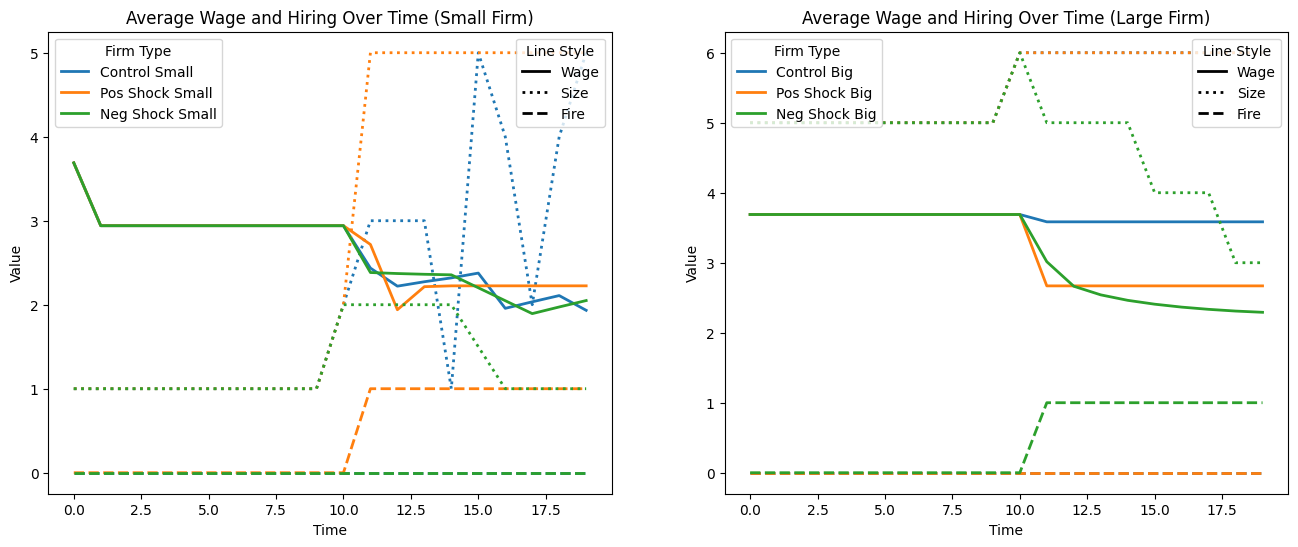

In [39]:
# Example usage:
# Suppose you already have your simulation dictionary defined as:
simulations = {
    'Control Small': irf_simul_young_small_noshock,
    'Pos Shock Small': irf_simul_young_small_posshock,
    'Neg Shock Small': irf_simul_young_small_negshock,
    'Control Big': irf_simul_young_big_noshock,
    'Pos Shock Big': irf_simul_young_big_posshock,
    'Neg Shock Big': irf_simul_young_big_negshock,
#    'Old Big': irf_simul_old_big
}

# And you've computed average wages and hiring as before:
def get_avg_wage(sim_df):
    employed = sim_df[sim_df['f'] > 0]  # Employed workers only
    return employed.groupby('t')['w'].mean()
def get_avg_wage_sen(sim_df):
    employed = sim_df[(sim_df['f'] > 0) & (sim_df['S'] > 1)]  # Employed senior workers only
    return employed.groupby('t')['w'].mean()
def get_sep_rate(sim_df):
    # Filter for employed juniors (f > 0 and S == 1)
    #juniors = sim_df[(sim_df['f'] > 0) & (sim_df['S'] == 1)]
    #employed = sim_df[sim_df['f'] > 0]
    # Group by time 't' and calculate the separation rate as the mean of the condition (D==3)
    sep_rate = sim_df.groupby('t')['D'].apply(lambda x: (x == 3).sum())
    return sep_rate

avg_size = {name: get_avg_column(df,'n') for name, df in simulations.items()}
avg_wages = {name: get_avg_wage_sen(df) for name, df in simulations.items()}
avg_shock = {name: get_avg_column(df,'W1') for name, df in simulations.items()}
avg_sep = {name: get_sep_rate(df) for name, df in simulations.items()}
#avg_hirings = {name: get_avg_hiring(df) for name, df in simulations.items()}
small_names = ['Control Small', 'Pos Shock Small', 'Neg Shock Small']
big_names = ['Control Big', 'Pos Shock Big', 'Neg Shock Big']
# Now create a plot using the same color for each simulation group
plt.figure(figsize=(16, 6))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
for i, name in enumerate(small_names):
    color = colors[i % len(colors)]
    wage_series = avg_wages[name]
    #hiring_series = avg_hirings[name]
    size_series = avg_size[name]
    shock_series = avg_shock[name]  
    sep_series = avg_sep[name]      
    # Solid line for wage
    plt.plot(wage_series.index, wage_series, lw=2, color=color)
    plt.plot(size_series.index, size_series, lw=2, color=color, linestyle=':')  
    plt.plot(sep_series.index, sep_series, lw=2, color=color, linestyle='--')
    # Dotted line for hiring
    #plt.plot(hiring_series.index, hiring_series, lw=2, color=color, linestyle=':')
  
    #plt.plot(shock_series.index, shock_series, lw=2, color=color, linestyle='--')    

# Set discrete x-ticks based on the time points

all_times = np.sort(np.unique(np.concatenate([wage.index for wage in avg_wages.values()])))
#plt.xticks(all_times, all_times)
plt.xticks()

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Average Wage and Hiring Over Time (Small Firm)')
add_custom_legends(list(small_names),line_labels=['Wage','Size','Fire'])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
for i, name in enumerate(big_names):
    color = colors[i % len(colors)]
    wage_series = avg_wages[name]
    #hiring_series = avg_hirings[name]
    size_series = avg_size[name]
    shock_series = avg_shock[name]
    sep_series = avg_sep[name]      
        
    # Solid line for wage
    plt.plot(wage_series.index, wage_series, lw=2, color=color)
    plt.plot(size_series.index, size_series, lw=2, color=color, linestyle=':')
    plt.plot(sep_series.index, sep_series, lw=2, color=color, linestyle='--')
    # Dotted line for hiring
    #plt.plot(hiring_series.index, hiring_series, lw=2, color=color, linestyle=':')
    
    #plt.plot(shock_series.index, shock_series, lw=2, color=color, linestyle='--')    

# Set discrete x-ticks based on the time points

all_times = np.sort(np.unique(np.concatenate([wage.index for wage in avg_wages.values()])))
#plt.xticks(all_times, all_times)
plt.xticks()

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Average Wage and Hiring Over Time (Large Firm)')

# Add the custom legends by calling the helper function
add_custom_legends(list(big_names),line_labels=['Wage','Size','Fire'])

plt.show()

In [28]:
from numba import cuda, float64
import math

# Assume n_rho is known (e.g. 100)
NRHO = 100

@cuda.jit(device=True)
def interp_gpu(point, x, y, n):
    # Generic linear interpolation device function.
    if point <= x[0]:
        return y[0]
    elif point >= x[n-1]:
        return y[n-1]
    else:
        idx = 0
        for i in range(n - 1):
            if x[i] <= point and point < x[i+1]:
                idx = i
                break
        if x[idx+1] == x[idx]:
            return y[idx]
        return y[idx] + (point - x[idx]) * (y[idx+1] - y[idx]) / (x[idx+1] - x[idx])

@cuda.jit(device=True)
def find_rho_star(rho_grid, foc_slice, n_rho):
    # Given a monotonic foc_slice, return the rho value where foc crosses zero.
    if foc_slice[0] >= 0:
        return rho_grid[0]
    elif foc_slice[n_rho-1] <= 0:
        return rho_grid[n_rho-1]
    else:
        # Use interp_gpu to compute the zero crossing:
        return interp_gpu(0.0, rho_grid, foc_slice, n_rho)

@cuda.jit(device=True)
def compute_rho_star_for_indices(iz, in0, in1, iv, iq, foc, rho_grid, n_rho):
    # Load the foc slice for the given indices into a local array.
    # Note: NRHO must be >= n_rho.
    temp = cuda.local.array(NRHO, float64)
    for j in range(n_rho):
        temp[j] = foc[iz, in0, in1, j, iv, iq]
    # Enforce monotonicity on the foc slice.
    for j in range(1, n_rho):
        if temp[j] < temp[j-1]:
            temp[j] = temp[j-1]
    return find_rho_star(rho_grid, temp, n_rho)

@cuda.jit
def rho_star_kernel(pc, foc, rho_grid, N_grid, N_grid1, n_bar1, rho_star_out):
    """
    Cleaned-up kernel: each thread computes one element of rho_star_out,
    using the helper function compute_rho_star_for_indices.
    """
    pos = cuda.grid(1)
    num_z, num_n, num_n1, num_v, num_q = pc.shape
    total = num_z * num_n * num_n1 * num_v * num_q
    if pos >= total:
        return

    # Map the flat thread index to multi-dimensional indices.
    iq   = pos % num_q
    rem  = pos // num_q
    iv   = rem % num_v
    rem  = rem // num_v
    in1  = rem % num_n1
    rem  = rem // num_n1
    in0  = rem % num_n
    iz   = rem // num_n

    # Skip invalid combinations.
    if N_grid[in0] + N_grid1[in1] > n_bar1:
        rho_star_out[iz, in0, in1, iv, iq] = 0.0
        return

    # Compute rho_star for this combination using our device helper.
    rho_val = compute_rho_star_for_indices(iz, in0, in1, iv, iq, foc, rho_grid, foc.shape[3])
    rho_star_out[iz, in0, in1, iv, iq] = rho_val


In [32]:
import numpy as np
import math
import time
from numba import cuda, float64, njit
import timeit
# Define dimensions (example values).
#num_z, num_n, num_n1, num_v, num_q = 3, 10, 8, 100, 5
#n_rho = 100  # length of rho_grid

# Create example input arrays.
pc   = np.random.rand(p.num_z, p.num_n, p.num_n1, p.num_v, p.num_q)
# Generate foc values in [-1, 1] to ensure a crossing exists.
foc  = np.random.rand(p.num_z, p.num_n, p.num_n1, 100, p.num_v, p.num_q) * 2 - 1
rho_grid = np.linspace(0, 1, 100)
N_grid   = np.linspace(0, p.n_bar, p.num_n)
N_grid1  = np.linspace(0, p.n_bar1, p.num_n1)
n_bar1   = p.n_bar1  # example threshold
# --------------------------------------
# CPU helper function using np.searchsorted
# --------------------------------------
@njit
def interp_cpu(point, x, y):
    """CPU interpolation as in your original interp function."""
    if point < x[0]:
        return y[0]
    elif point > x[-1]:
        return y[-1]
    else:
        idx = np.searchsorted(x, point) - 1
        # Avoid division by zero if x[idx+1]==x[idx]
        if x[idx+1] == x[idx]:
            return y[idx]
        return y[idx] + (point - x[idx]) * (y[idx+1] - y[idx]) / (x[idx+1] - x[idx])

# --------------------------------------
# CPU version for computing rho_star over all indices
# (mimics the logic used in your original function)
# --------------------------------------
@njit
def rho_star_cpu(pc, foc, rho_grid, N_grid, N_grid1, n_bar1):
    num_z, num_n, num_n1, num_v, num_q = pc.shape
    n_rho = foc.shape[3]
    rho_star_out = np.empty((num_z, num_n, num_n1, num_v, num_q), dtype=np.float64)
    for iz in range(num_z):
        for in0 in range(num_n):
            for in1 in range(num_n1):
                # Skip invalid combinations as in your code.
                if N_grid[in0] + N_grid1[in1] > n_bar1:
                    rho_star_out[iz, in0, in1, ...] = 0.0
                    continue
                for iv in range(num_v):
                    for iq in range(num_q):
                        # Get the foc slice corresponding to the rho_grid axis.
                        foc_slice = foc[iz, in0, in1, :, iv, iq].copy()
                        # Impose increasing (monotonic) order
                        for j in range(1, n_rho):
                            if foc_slice[j] < foc_slice[j-1]:
                                foc_slice[j] = foc_slice[j-1]
                        # Use interp_cpu to find the rho value at which foc crosses 0.
                        # This mimics: interp(0, rho_grid, foc_slice)
                        rho_star_out[iz, in0, in1, iv, iq] = interp_cpu(0, rho_grid, foc_slice)
    return rho_star_out

# --------------------------------------
# GPU device helper function (manual search, equivalent to np.searchsorted)
# --------------------------------------
@cuda.jit(device=True)
def interp_gpu(point, x, y, n):
    # If the point is outside the bounds, return the corresponding edge value.
    if point <= x[0]:
        return y[0]
    elif point >= x[n-1]:
        return y[n-1]
    else:
        idx = 0
        # Manually search for the index where x[idx] <= point < x[idx+1]
        for i in range(n - 1):
            if x[i] <= point and point < x[i+1]:
                idx = i
                break
        # Avoid division by zero.
        if x[idx+1] == x[idx]:
            return y[idx]
        return y[idx] + (point - x[idx]) * (y[idx+1] - y[idx]) / (x[idx+1] - x[idx])

# --------------------------------------
# GPU Kernel Version
# --------------------------------------

# --------------------------------------
# Main Comparison Script
# --------------------------------------
def cuda_compute(pc, foc, rho_grid, N_grid, N_grid1, n_bar1):


    # ----- Run GPU version -----
    start_gpu = time.time()
    # Transfer inputs to GPU.
    d_pc       = cuda.to_device(pc)
    d_foc      = cuda.to_device(foc)
    d_rho_grid = cuda.to_device(rho_grid)
    d_N_grid   = cuda.to_device(N_grid)
    d_N_grid1  = cuda.to_device(N_grid1)
    # Allocate output array on GPU.
    rho_star_shape = (p.num_z, p.num_n, p.num_n1, p.num_v, p.num_q)
    d_rho_star = cuda.device_array(rho_star_shape, dtype=np.float64)

    total_threads = np.prod(rho_star_shape)
    threads_per_block = 256
    blocks_per_grid = math.ceil(total_threads / threads_per_block)

    # Launch the GPU kernel.
    rho_star_kernel[blocks_per_grid, threads_per_block](d_pc, d_foc, d_rho_grid,
                                                          d_N_grid, d_N_grid1, n_bar1, d_rho_star)
    cuda.synchronize()
    rho_gpu = d_rho_star.copy_to_host()
    end_gpu = time.time()
    gpu_time = end_gpu - start_gpu
    return gpu_time



# ----- Run CPU version -----
#start_cpu = time.time()
#rho_cpu = rho_star_cpu(pc, foc, rho_grid, N_grid, N_grid1, n_bar1)
#end_cpu = time.time()
#cpu_time = end_cpu - start_cpu

# Timing Option A
time_a = timeit.timeit(lambda:rho_star_cpu(pc, foc, rho_grid, N_grid, N_grid1, n_bar1), number=100)
# Timing Option B
time_b = timeit.timeit(lambda:cuda_compute(pc, foc, rho_grid, N_grid, N_grid1, n_bar1), number=100)

print("Time for CPU : {:.4f} seconds".format(time_a))
print("Time for GPU : {:.4f} seconds".format(time_b))
# ----- Compare outputs and timings -----
#difference = np.abs(rho_cpu - rho_gpu).max()
#print("Max difference between CPU and GPU results:", difference)
#print("CPU time: {:.6f} s".format(cpu_time))
#print("GPU time: {:.6f} s".format(gpu_time))


Time for CPU : 2.7902 seconds
Time for GPU : 2.0456 seconds


In [21]:
import numpy as np
d = np.array((2,1,0))
a = np.fmin(1/d,1)

C:\Users\andre\AppData\Local\Temp\ipykernel_22204\785944310.py:3: RuntimeWarning: divide by zero encountered in divide
  a = np.fmin(1/d,1)


In [26]:
d=np.array((np.nan,1))
a=np.fmin(d,1)

In [27]:
a

array([1., 1.])

In [4]:
a

array([1, 2, 3])

In [29]:
model.pe_star[2,0,4,48,0]

0.06191349709059191

Look in the data:
1. Passthrough of wages to shocks across firm size? Is the passthrough smaller, even negative, in small firms?
2. For firings: what happens to wages upon separation?

On theory:
Is math mathing here? Can a firm with higher prod be so much larger that its wages are lower?

With hiring and leaving (high prod)

In [14]:
(pr,rho,q,nt,allow_hiring,allow_leave,update_z,z_dir,seed) = (p.z_0-1,30,p.q_0,10, True,False,True,1,False)

In [15]:
#Simulating a bunch of firms
irf_simul_young_small = sim.simulate_firm(pr,1,0,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_young_big =   sim.simulate_firm(pr,4,0,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_old_small =   sim.simulate_firm(pr,0,1,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_old_big =     sim.simulate_firm(pr,0,4,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_all_small =   sim.simulate_firm(pr,1,1,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)
irf_simul_all_big =     sim.simulate_firm(pr,2,2,rho,q,nt, allow_hiring,allow_leave,update_z,z_dir,seed)

In [ ]:


def add_custom_legends(simulation_names, line_labels=['Wage', 'Hiring'], line_styles=None, lw=2, sim_loc='upper left', style_loc='upper right'):
    """
    Adds custom legends to the current plot.
    
    Parameters:
    - simulation_names: list of str, names of your simulation groups.
    - lw: float, line width for the legend handles.
    - sim_loc: str, location for the simulation group legend.
    - style_loc: str, location for the line style legend.
    """
    # Get the default color cycle from matplotlib
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    # Create legend handles for simulation groups (colors)
    sim_handles = [Line2D([0], [0], color=colors[i % len(colors)], lw=lw)
                   for i, name in enumerate(simulation_names)]
    legend1 = plt.legend(sim_handles, simulation_names, title="Simulation Group", loc=sim_loc)
    
    # Use default line styles if none provided
    if line_styles is None:
        default_styles = ['-', ':', '--', '-.']
        line_styles = default_styles[:len(line_labels)]
    
    # Create legend handles for the line styles
    style_handles = [Line2D([0], [0], color='black', lw=lw, linestyle=ls) 
                     for ls in line_styles]
    legend2 = plt.legend(style_handles, line_labels, title="Line Style", loc=style_loc)
    
    # Ensure both legends appear on the plot
    plt.gca().add_artist(legend1)

# Example usage:
# Suppose you already have your simulation dictionary defined as:
simulations = {
    'Young Small': irf_simul_young_small,
    'Young Big': irf_simul_young_big,
#    'Old Small': irf_simul_old_small,
#    'Old Big': irf_simul_old_big
}

# And you've computed average wages and hiring as before:
def get_avg_wage(sim_df):
    employed = sim_df[sim_df['f'] > 0]  # Employed workers only
    return employed.groupby('t')['w'].mean()

def get_avg_hiring(sim_df):
    return sim_df.groupby('t')['n0'].mean()

avg_size = {name: get_avg_column(df,'n') for name, df in simulations.items()}
avg_wages = {name: get_avg_wage(df) for name, df in simulations.items()}
avg_shock = {name: get_avg_column(df,'z') for name, df in simulations.items()}
#avg_hirings = {name: get_avg_hiring(df) for name, df in simulations.items()}

# Now create a plot using the same color for each simulation group
plt.figure(figsize=(10, 6))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, name in enumerate(simulations.keys()):
    color = colors[i % len(colors)]
    wage_series = avg_wages[name]
    #hiring_series = avg_hirings[name]
    size_series = avg_size[name]
    shock_series = avg_shock[name]        
    # Solid line for wage
    plt.plot(wage_series.index, wage_series, lw=2, color=color)
    # Dotted line for hiring
    #plt.plot(hiring_series.index, hiring_series, lw=2, color=color, linestyle=':')
    plt.plot(size_series.index, size_series, lw=2, color=color, linestyle=':')    
    plt.plot(shock_series.index, shock_series, lw=2, color=color, linestyle='--')    

# Set discrete x-ticks based on the time points

all_times = np.sort(np.unique(np.concatenate([wage.index for wage in avg_wages.values()])))
plt.xticks(all_times, all_times)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Average Wage and Hiring Over Time (Discrete Time Axis)')

# Add the custom legends by calling the helper function
add_custom_legends(list(simulations.keys()),line_labels=['Wage', 'Size', 'Shock'])

plt.show()

AttributeError: 'DataFrame' object has no attribute 'grouseedy'

In [ ]:
#Young small plot, so understand why its wages stay the same
def get_avg_value(sim_df):
    employed = sim_df[sim_df['f'] > 0]
    # Average hiring is assumed to be in column 'n0'
    return employed.groupby('t')['W1'].mean()
avg_value = {name: get_avg_value(df) for name, df in simulations.items()}



# Plot for Small Firms
plt.figure(figsize=(8, 6))
for i, name in enumerate(small_names):
    color = colors[i % len(colors)]
    plt.plot(avg_wages[name].index, avg_wages[name], label=f'{name} Wage',color=color)
    # Plot average hiring (dotted line)
    #plt.plot(avg_hirings[name].index, avg_hirings[name], linestyle=':', label=f'{name} Hiring',color=color)
    # Plot average value 
    plt.plot(avg_prod[name].index, avg_prod[name], linestyle='dashdot', label=f'{name} Prod',color=color)    
# Combine all time points to set discrete ticks
all_times = np.sort(np.unique(np.concatenate([wage_series.index for wage_series in avg_wages.values()])))
plt.xticks(all_times, all_times)  # Set the x-axis ticks to the discrete time points

plt.title('Average Wage Over Time (Small Firms)')
plt.xlabel('Time')
plt.ylabel('Average Log Wage')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'grouseedy'

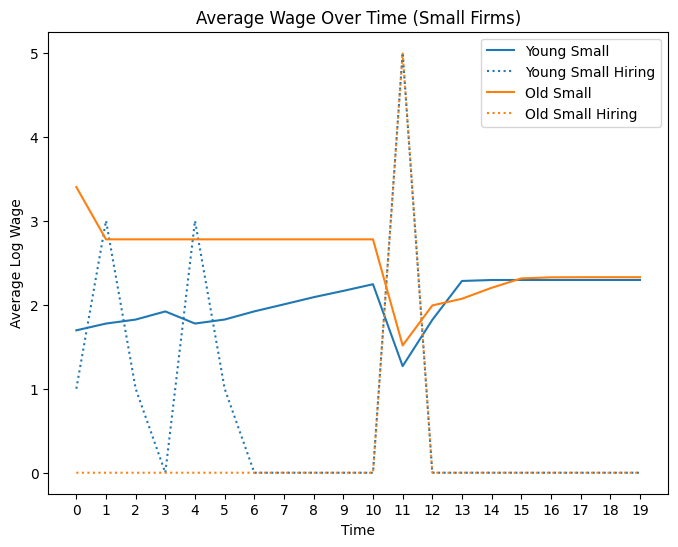

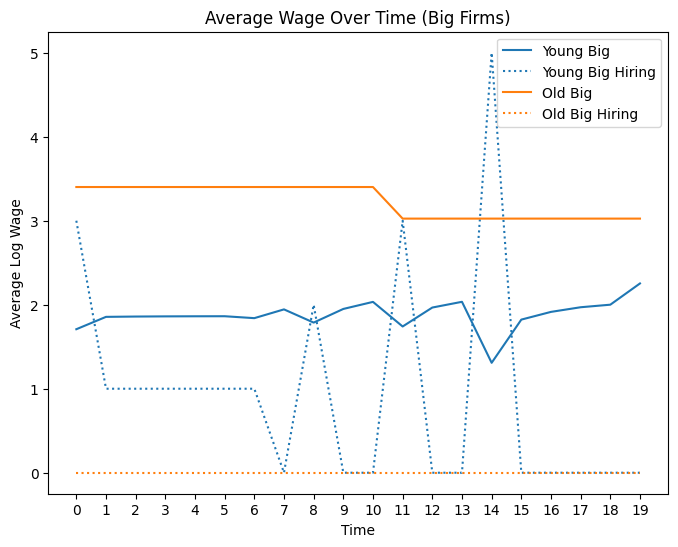

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Store your simulation DataFrames in a dictionary
simulations = {
    'Young Small': irf_simul_young_small,
    'Young Big': irf_simul_young_big,
    'Old Small': irf_simul_old_small,
    'Old Big': irf_simul_old_big,
    'All Small': irf_simul_all_small,
    'All Big': irf_simul_all_big
}

# Helper function to compute average wage over time (only for employed workers)
def get_avg_wage(sim_df):
    employed = sim_df[sim_df['f'] > 0]
    return employed.groupby('t')['w'].mean()
def get_avg_hiring(sim_df):
    employed = sim_df[sim_df['f'] > 0]
    # Average hiring is assumed to be in column 'n0'
    return employed.groupby('t')['n0'].mean()

# Compute average wages for each simulation and store them in a new dictionary
avg_wages = {name: get_avg_wage(df) for name, df in simulations.items()}
avg_hirings = {name: get_avg_hiring(df) for name, df in simulations.items()}


# Define groups for small and big firms
small_names = ['Young Small', 'Old Small']
big_names = ['Young Big', 'Old Big']
# Get Matplotlib's default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot for Small Firms
plt.figure(figsize=(8, 6))
for i, name in enumerate(small_names):
    color = colors[i % len(colors)]
    plt.plot(avg_wages[name].index, avg_wages[name], label=name,color=color)
    # Plot average hiring (dotted line)
    plt.plot(avg_hirings[name].index, avg_hirings[name], linestyle=':', label=f'{name} Hiring',color=color)
# Combine all time points to set discrete ticks
all_times = np.sort(np.unique(np.concatenate([wage_series.index for wage_series in avg_wages.values()])))
plt.xticks(all_times, all_times)  # Set the x-axis ticks to the discrete time points

plt.title('Average Wage Over Time (Small Firms)')
plt.xlabel('Time')
plt.ylabel('Average Log Wage')
plt.legend()
plt.show()

# Plot for Big Firms
plt.figure(figsize=(8, 6))
for i, name in enumerate(big_names):
    color = colors[i % len(colors)]
    plt.plot(avg_wages[name].index, avg_wages[name], label=name,color=color)
    # Plot average hiring (dotted line)
    plt.plot(avg_hirings[name].index, avg_hirings[name], linestyle=':', label=f'{name} Hiring',color=color)
# Combine all time points to set discrete ticks
all_times = np.sort(np.unique(np.concatenate([wage_series.index for wage_series in avg_wages.values()])))
plt.xticks(all_times, all_times)  # Set the x-axis ticks to the discrete time points

plt.title('Average Wage Over Time (Big Firms)')
plt.xlabel('Time')
plt.ylabel('Average Log Wage')
plt.legend()
plt.show()


Without hiring (low prod)

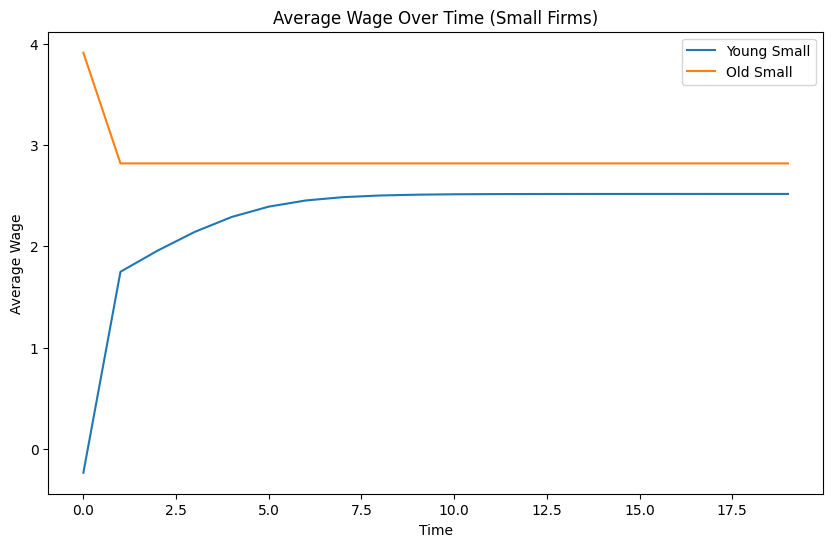

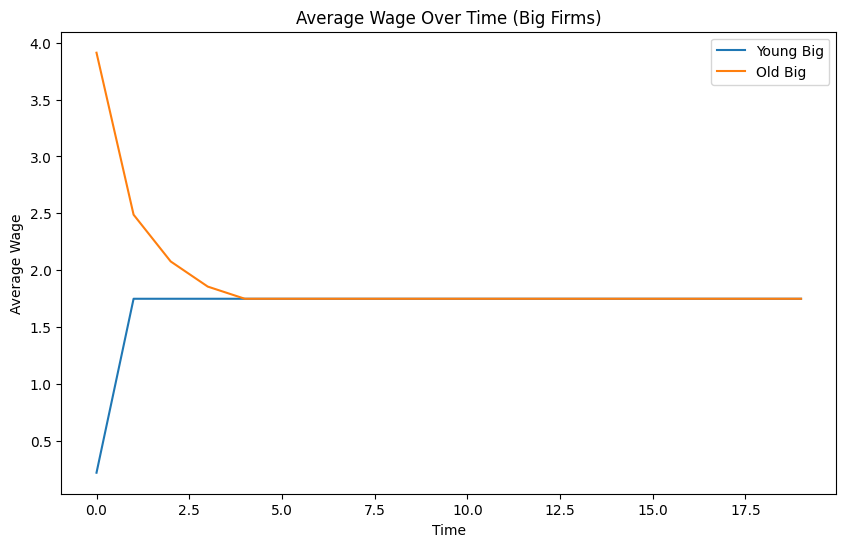

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Store your simulation DataFrames in a dictionary
simulations = {
    'Young Small': irf_simul_young_small,
    'Young Big': irf_simul_young_big,
    'Old Small': irf_simul_old_small,
    'Old Big': irf_simul_old_big,
    'All Small': irf_simul_all_small,
    'All Big': irf_simul_all_big
}

# Helper function to compute average wage over time (only for employed workers)
def get_avg_wage(sim_df):
    employed = sim_df[sim_df['f'] > 0]
    return employed.groupby('t')['w'].mean()

# Compute average wages for each simulation and store them in a new dictionary
avg_wages = {name: get_avg_wage(df) for name, df in simulations.items()}

# Define groups for small and big firms
small_names = ['Young Small', 'Old Small']
big_names = ['Young Big', 'Old Big']

# Plot for Small Firms
plt.figure(figsize=(10, 6))
for name in small_names:
    plt.plot(avg_wages[name].index, avg_wages[name], label=name)
plt.title('Average Wage Over Time (Small Firms)')
plt.xlabel('Time')
plt.ylabel('Average Wage')
plt.legend()
plt.show()

# Plot for Big Firms
plt.figure(figsize=(10, 6))
for name in big_names:
    plt.plot(avg_wages[name].index, avg_wages[name], label=name)
plt.title('Average Wage Over Time (Big Firms)')
plt.xlabel('Time')
plt.ylabel('Average Wage')
plt.legend()
plt.show()

# Alternatively, plot all simulations together
#plt.figure(figsize=(10, 6))
#for name, wage_series in avg_wages.items():
#    plt.plot(wage_series.index, wage_series, label=name)
#plt.title('Average Wage Over Time (All Simulations)')
#plt.xlabel('Time')
#plt.ylabel('Average Wage')
#plt.legend()
#plt.show()


Simulation timings

In [23]:
from time import time
profiler = cProfile.Profile()
profiler.enable()
simul_result=sim.simulate_val()
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
#stats.print_stats()

Exception ignored When destroying _lsprof profiler:
Traceback (most recent call last):
  File "C:\Users\andre\AppData\Local\Temp\ipykernel_7668\3578897233.py", line 3, in <module>
RuntimeError: Cannot install a profile function while another profile function is being installed


ValueError: NumPy boolean array indexing assignment cannot assign 1000 input values to the 0 output values where the mask is true

In [17]:
from timeit import timeit
print("Simulation time:", timeit(sim.simulate_val, number=10))

ValueError: NumPy boolean array indexing assignment cannot assign 1000 input values to the 0 output values where the mask is true

Time to perform 10 simulations:
Simulation time 1st time: 140.17326560002402
Simulation removed allocate_workers_to_vac_rand: 132.93263450000086
Simulation, when add z,prod,n0,n1 to the data at the end: 126.88947200000985
Simulation after removing closed firms from F_set: 133.41353940000408????
Simulation after removing closed firms from F_set, again, extra minor tweaks: 126.22359539999161
Simulation after setting initial prod back to avg: 195.49598599999445 OOOOOH Shit. tbf, the laptop also lost connection to the charger at some point, so this may have been that
Simulation after removing empty firms + vectorizing the 2d interpolation: 8.297498100000666
Simulation after vectorizing n0 and n1 counts: 4.869289499998558
Simulation after vectorizing prod interp: 3.3665357000136282
Final simulation (some minor updates ig?): 3.1729782999900635 

HUGE IMPROVEMENT